In [22]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from Code.descent_methods import *
from Code.utilities import MSELoss_method, jax_loss_grad, train_test_split, plot_test_results
from Code.activation_functions import sigmoid

# Import tools from the first project 
from Code.project1_tools import feature_matrix_2d, r2_sampling

import jax.numpy as jnp
from jax import nn
import numpy as np
from matplotlib import pyplot as plt


In [23]:
# Define a neural network
def neural_network(beta, X, activation = sigmoid): # nn.sigmoid??
    out = X.copy()
    for i in range(1, len(beta.keys())//2):
        #print(f'{out.shape} + {beta[f"W{i}"].shape}')

        out = activation(jnp.add(jnp.dot(out, beta[f"W{i}"]), beta[f"b{i}"]))
        
        #out = jnp.dot(out, beta[f"W{i}"])
    out_final = jnp.add(jnp.dot(out, beta[f"W{len(beta.keys())//2}"]), beta[f"b{len(beta.keys())//2}"])
    #print(out.shape)
    return out_final

# Construct beta with desired layer structure
layers = [2 ,6, 6, 1]
beta0 = {}
# Add random initialisation
for i in range(1,len(layers)):
    beta0[f"W{i}"] = np.random.random((layers[i-1], layers[i]))
    beta0[f"b{i}"] = np.random.random()

# Sample points and split in train and test
num_points = 100
data = r2_sampling(num_points, sigma2=0.3)
x, y, z = data["x"], data["y"], data["z"]
X = feature_matrix_2d(x, y, layers[0])
X_train, y_train, X_test, y_test, test_index = train_test_split(X, z, 0.2)
m = int(len(y_train) / 10) # Number of of minibatch when using batch size 10
epochs = 50


# def model(beta, X):
#     return jnp.dot(X, beta["W1"])

loss_func = MSELoss_method(neural_network)
loss_grad = jax_loss_grad(loss_func)


### Plain GD

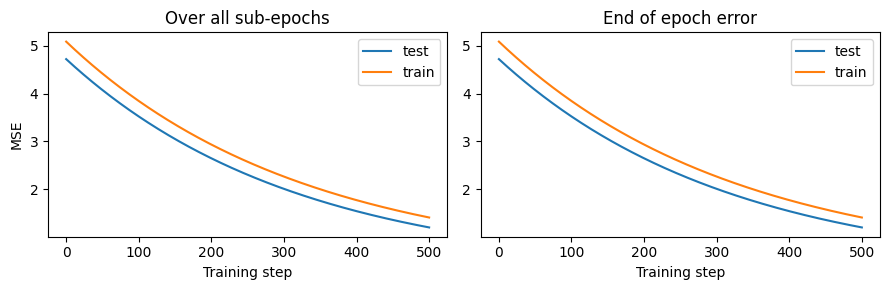

In [24]:
result_GD = GD(X_train, y_train, X_test, y_test, grad_method=loss_grad, n_epochs=epochs*10, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_GD["test_loss_list"], result_GD["train_loss_list"], 1)

### Stochastic

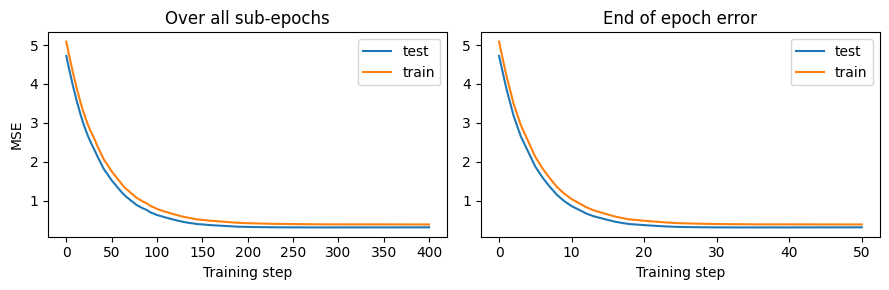

In [25]:
result_SGD = SGD(X_train, y_train, X_test, y_test, grad_method=loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_SGD["test_loss_list"], result_SGD["train_loss_list"], m)

### Adagrad

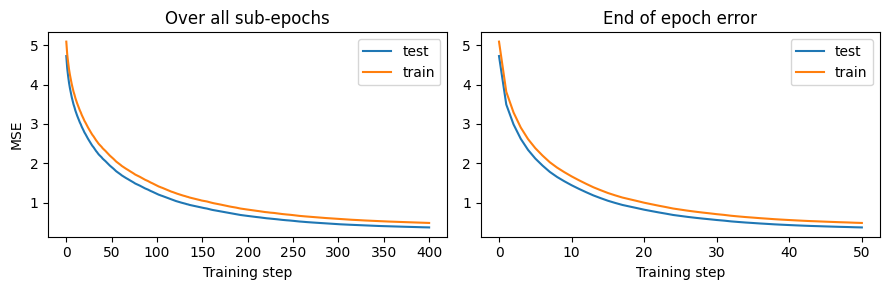

In [26]:
result_adagrad = SGD_adagrad(X_train, y_train, X_test, y_test, grad_method=loss_grad, n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_adagrad["test_loss_list"], result_adagrad["train_loss_list"], m)

### RMS prop

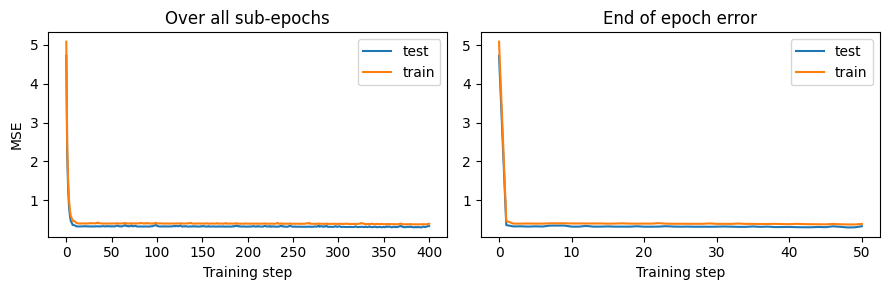

In [27]:
result_RMS_prop = SGD_RMS_prop(X_train, y_train, X_test, y_test, grad_method=loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_RMS_prop["test_loss_list"], result_RMS_prop["train_loss_list"], m)

### Adam

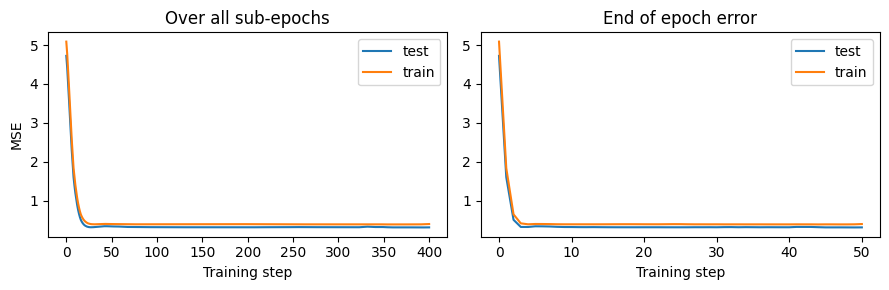

In [28]:
result_adam = SGD_adam(X_train, y_train, X_test, y_test, grad_method=loss_grad,n_epochs=epochs, beta0=beta0, test_loss_func=loss_func)
plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], m)